In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
# cross_val_score1
from sklearn.model_selection import RandomizedSearchCV
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB
#Stacking
from mlxtend.classifier import StackingClassifier

train_df = pd.read_csv("survey.csv")
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [353]:
# Data Cleaning
#missing data

#here we created 2 columns to fnd out about the null features in our data and their respective percentages 
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [354]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [355]:
print(train_df[['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere','treatment']].head(10))

   Age  Gender family_history    benefits care_options   anonymity  \
0   37  Female             No         Yes     Not sure         Yes   
1   44       M             No  Don't know           No  Don't know   
2   32    Male             No          No           No  Don't know   
3   31    Male            Yes          No          Yes          No   
4   31    Male             No         Yes           No  Don't know   
5   33    Male            Yes         Yes     Not sure  Don't know   
6   35  Female            Yes          No           No          No   
7   39       M             No          No          Yes         Yes   
8   42  Female            Yes         Yes          Yes          No   
9   23    Male             No  Don't know           No  Don't know   

                leave work_interfere treatment  
0       Somewhat easy          Often       Yes  
1          Don't know         Rarely        No  
2  Somewhat difficult         Rarely        No  
3  Somewhat difficult          Of

In [356]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
# Create lists by data tpe
intFeatures = ['Age']
floatFeatures = []
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not identified.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [357]:
train_df['Gender'].head(30)

0     Female
1          M
2       Male
3       Male
4       Male
5       Male
6     Female
7          M
8     Female
9       Male
10      Male
11      male
12    female
13      Male
14      Male
15    female
16      Male
17      Male
18      male
19      Male
20      Male
21      male
22      Male
23      Male
24      male
25      male
26      male
27    Female
28      male
29      Male
Name: Gender, dtype: object

In [358]:
#clean 'Gender'
#lower case all columm's elements
gender = train_df['Gender'].str.lower()
print(gender)

#Select unique elements
gender = train_df['Gender'].unique()
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)
#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())

0       female
1            m
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257         f
1258      male
Name: Gender, Length: 1259, dtype: object
['female' 'male' 'trans']


In [359]:

#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
# Fill with median values for children who are below 18 and elders who are impossibly above 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [360]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], "Don't know" )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [361]:
#Encoding data
labelDict = {}
for feature in train_df:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(train_df[feature])
    #creates a dictionary that maps the original labels to their corresponding encoded values.
    label_encoder_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = label_encoder.transform(train_df[feature])
    # Get labels
    # Creates a key-value pair in the labelDict dictionary, 
    # where the key is the feature name prefixed with 'label_' and the value is a list of the original labels mapped to their encoded values.
    labelKey = 'label_' + feature
    labelValue = [*label_encoder_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age ['0-20', '21-30', '31-65', '66-100']
label_Gender ['0-20', '21-30', '31-65', '66-100']
label_Country ['0-20', '21-30', '31-65', '66-100']
label_self_employed ['0-20', '21-30', '31-65', '66-100']
label_family_history ['0-20', '21-30', '31-65', '66-100']
label_treatment ['0-20', '21-30', '31-65', '66-100']
label_work_interfere ['0-20', '21-30', '31-65', '66-100']
label_no_employees ['0-20', '21-30', '31-65', '66-100']
label_remote_work ['0-20', '21-30', '31-65', '66-100']
label_tech_company ['0-20', '21-30', '31-65', '66-100']
label_benefits ['0-20', '21-30', '31-65', '66-100']
label_care_options ['0-20', '21-30', '31-65', '66-100']
label_wellness_program ['0-20', '21-30', '31-65', '66-100']
label_seek_help ['0-20', '21-30', '31-65', '66-100']
label_anonymity ['0-20', '21-30', '31-65', '66-100']
label_leave ['0-20', '21-30', '31-65', '66-100']
label_mental_health_consequence ['0-20', '21-30', '31-65', '66-100']
label_phys_health_consequence ['0-20', '21-30', '31-65', '66-100']


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


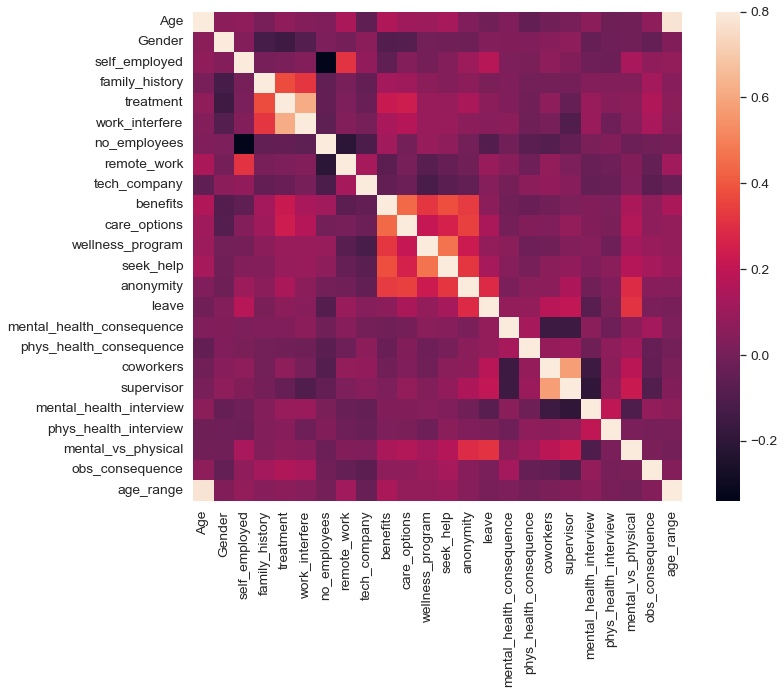

In [362]:
# Covariance Matrix
# Variability comparison between categories of variables
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

 <h2>This line below creates a heatmap using the seaborn library (sns.heatmap() function). It takes the correlation coefficient matrix (cm) as input and applies various parameters for customization.</h2>

cbar=True: Shows a color bar indicating the correlation values.
annot=True: Displays the correlation values on the heatmap.
square=True: Ensures that each cell in the heatmap is square-shaped.
fmt='.2f': Formats the displayed correlation values to two decimal places.
annot_kws={'size': 10}: Sets the size of the annotation text to 10.
yticklabels=cols.values: Sets the y-axis tick labels to the column names of the selected variables (cols).
xticklabels=cols.values: Sets the x-axis tick labels to the column names of the selected variables (cols).
plt.show(): This line displays the heatmap plot.

In summary, the code snippet selects the k variables with the highest correlation values with respect to the 
'treatment' variable. 
It then calculates the correlation coefficients for those variables and visualizes them using a heatmap. 
The heatmap represents the correlation values
between the selected variables, 
with darker colors indicating stronger positive or negative correlations. The code provides a way to explore 
and visualize the relationships between variables,
focusing on the top correlated variables with the 'treatment' variable.

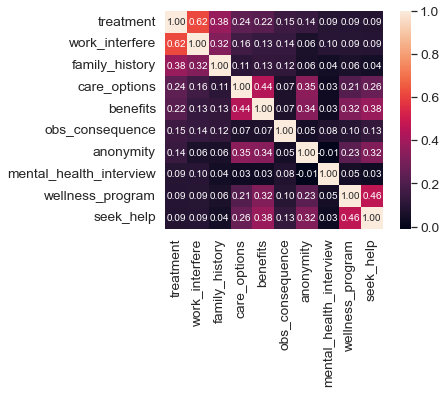

In [363]:
k = 10 #This value represents the number of top correlated variables you want to consider.
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h1>Some Charts to see the Data Relationship</h1>

Text(0.5, 12.199999999999974, 'Age')

<Figure size 864x576 with 0 Axes>

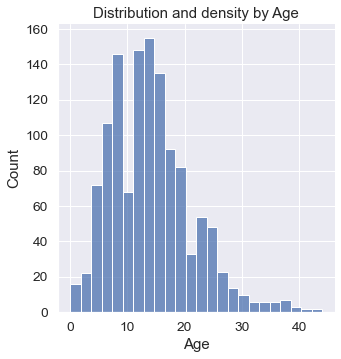

In [364]:

# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.displot(train_df["Age"], bins=24)# creates a probability density estimate
plt.title("Distribution and density by Age")
plt.xlabel("Age")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


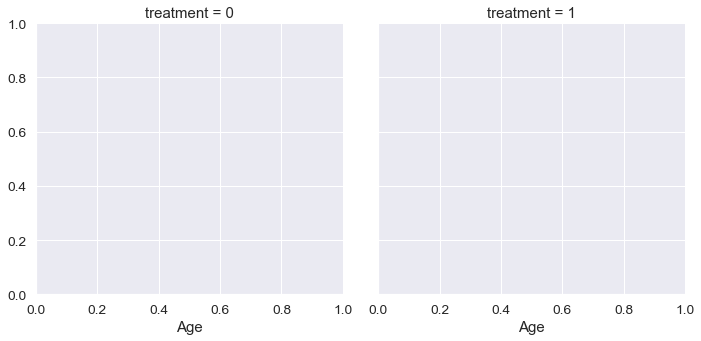

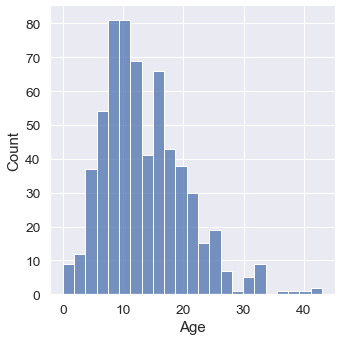

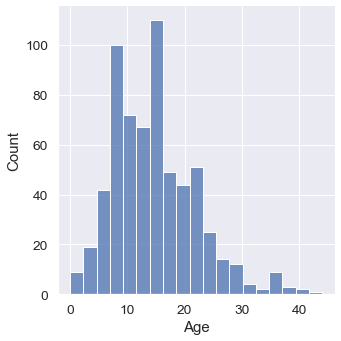

In [365]:

#Inference: The above plot shows the Age column with respect to density. We can see that density is higher from Age 10 to 20 years in our dataset.

j = sns.FacetGrid(train_df, col='treatment', height=5)
j = j.map(sns.displot, "Age")

Text(0.5, 1.0, 'Total Distribution by treated or not')

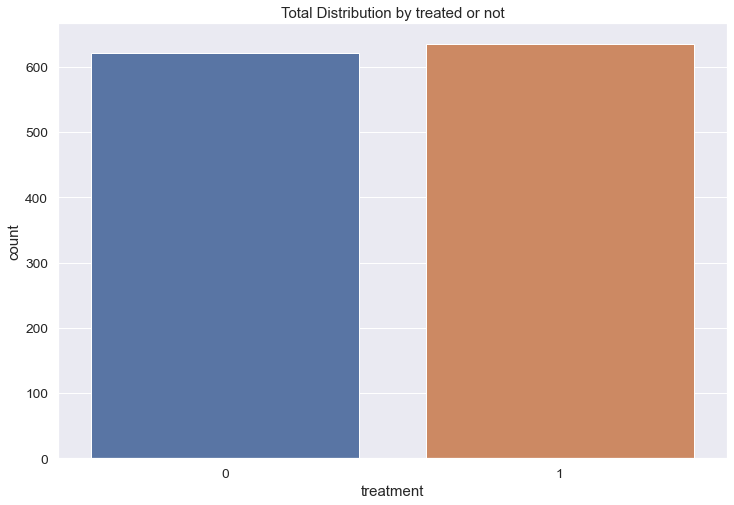

In [366]:
#Inference: Treatment 0 means treatment is not necessary 1 means it is.
#First Barplot shows that from age 0 to 10-year treatment is not necessary and is needed after 15 years.

plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
j = sns.countplot(x="treatment", data=train_df)
#j.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')
#Text(0.5, 1.0, ‘Total Distribution by treated or not’)

In [367]:
labelDict

{'label_Age': ['0-20', '21-30', '31-65', '66-100'],
 'label_Gender': ['0-20', '21-30', '31-65', '66-100'],
 'label_Country': ['0-20', '21-30', '31-65', '66-100'],
 'label_self_employed': ['0-20', '21-30', '31-65', '66-100'],
 'label_family_history': ['0-20', '21-30', '31-65', '66-100'],
 'label_treatment': ['0-20', '21-30', '31-65', '66-100'],
 'label_work_interfere': ['0-20', '21-30', '31-65', '66-100'],
 'label_no_employees': ['0-20', '21-30', '31-65', '66-100'],
 'label_remote_work': ['0-20', '21-30', '31-65', '66-100'],
 'label_tech_company': ['0-20', '21-30', '31-65', '66-100'],
 'label_benefits': ['0-20', '21-30', '31-65', '66-100'],
 'label_care_options': ['0-20', '21-30', '31-65', '66-100'],
 'label_wellness_program': ['0-20', '21-30', '31-65', '66-100'],
 'label_seek_help': ['0-20', '21-30', '31-65', '66-100'],
 'label_anonymity': ['0-20', '21-30', '31-65', '66-100'],
 'label_leave': ['0-20', '21-30', '31-65', '66-100'],
 'label_mental_health_consequence': ['0-20', '21-30', '3

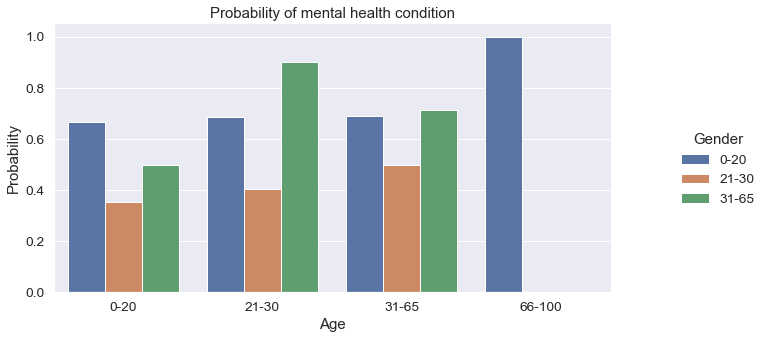

In [368]:
#Inference: Here we can see that more males are treated as compared to females in the dataset.

o = labelDict['label_age_range']
plot = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, aspect=2, legend_out = True)
plot.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability')
plt.xlabel('Age')

new_labels = labelDict['label_Gender']
for t, l in zip(plot._legend.texts, new_labels): t.set_text(l)
plot.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [369]:
train_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,0,0,1,0,2,0,1,1,...,2,1,1,1,1,1,1,0,0,1
1255,14,1,0,1,1,2,2,1,1,2,...,1,1,1,1,2,1,1,2,0,2
1256,16,1,0,1,1,4,5,0,1,2,...,1,2,2,0,0,1,1,1,0,2
1257,28,0,0,0,0,0,1,1,1,1,...,0,2,1,0,0,1,1,1,0,2


In [370]:
# 6. Scaling and fitting
# Features Scaling We're going to scale age, because is extremely different from the othere ones.

# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [371]:
# Spliltting the dataset

# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

# 7. Tuning
Evaluating a Classification Model.
This function will evalue:

Classification accuracy: percentage of correct predictions
Null accuracy: accuracy that could be achieved by always predicting the most frequent class
Percentage of ones
Percentage of zeros
Confusion matrix: Table that describes the performance of a classification model

  True Positives (TP): we correctly predicted that they do have diabetes
  True Negatives (TN): we correctly predicted that they don't have diabetes
  False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
  Falsely predict positive
  False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
  Falsely predict negative
False Positive Rate

Precision of Positive value
AUC: is the percentage of the ROC plot that is underneath the curve
  .90-1 = excellent (A)
  .80-.90 = good (B)
  .70-.80 = fair (C)
  .60-.70 = poor (D)
  .50-.60 = fail (F)
And some others values for tuning processes. More information: [http://www.ritchieng.com/machine-learning-evaluate-classification-model/]:

In [372]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob)[0]
    #,0.3
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [373]:
#Tuning with cross validation score
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [374]:
#Tuning with GridSearchCV
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [375]:
#Tuning with RandomizedSearchCV
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [376]:
# 8. Evaluating models


# Logistic Regression
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 0.7962962962962963
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


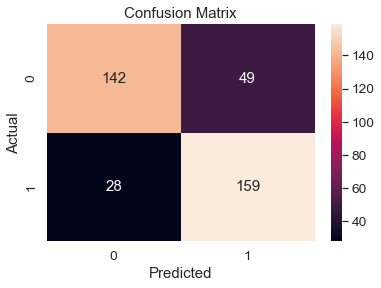

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372
False Positive Rate: 0.25654450261780104
Precision: 0.7644230769230769
AUC Score: 0.7968614385306716
Cross-validated AUC: 0.8753623882722146
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09193053 0.90806947]
 [0.95991564 0.04008436]
 [0.96547467 0.03452533]
 [0.78757121 0.21242879]
 [0.38959922 0.61040078]
 [0.05264207 0.94735793]
 [0.75035574 0.24964426]
 [0.19065116 0.80934884]
 [0.61612081 0.38387919]
 [0.47699963 0.52300037]]
First 10 predicted probabilities:
 [[0.90806947]
 [0.04008436]
 [0.03452533]
 [0.21242879]
 [0.61040078]
 [0.94735793]
 [0.24964426]
 [0.80934884]
 [0.38387919]
 [0.52300037]]


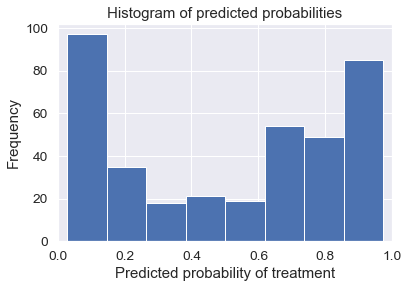

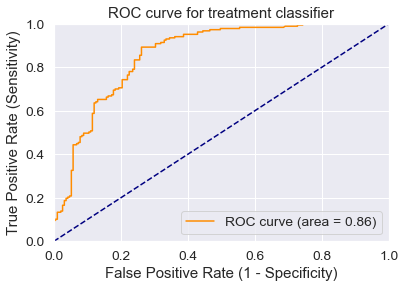

[[142  49]
 [ 28 159]]


In [377]:
logisticRegression()

In [378]:
#Bagging
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

########### Bagging ###############
Accuracy: 0.7804232804232805
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0]


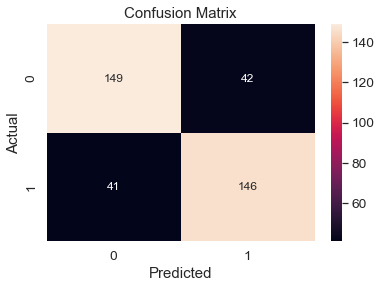

Classification Accuracy: 0.7804232804232805
Classification Error: 0.21957671957671954
False Positive Rate: 0.2198952879581152
Precision: 0.776595744680851
AUC Score: 0.7804266875717445
Cross-validated AUC: 0.8470574942193126
First 10 predicted responses:
 [0 0 0 0 0 0 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.51666667 0.48333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.7        0.3       ]
 [0.8        0.2       ]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.5        0.5       ]
 [0.3        0.7       ]
 [0.2        0.8       ]]
First 10 predicted probabilities:
 [[0.48333333]
 [0.        ]
 [0.        ]
 [0.3       ]
 [0.2       ]
 [0.5       ]
 [0.        ]
 [0.5       ]
 [0.7       ]
 [0.8       ]]


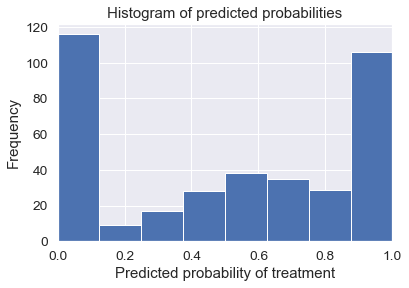

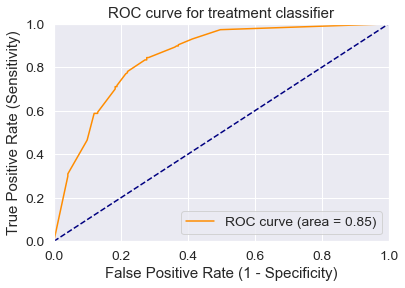

[[149  42]
 [ 41 146]]


In [379]:
bagging()

In [380]:
#Boosting
def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

########### Boosting ###############
Accuracy: 0.8174603174603174
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


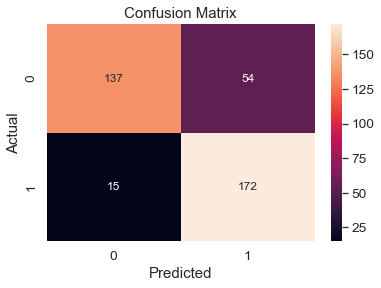

Classification Accuracy: 0.8174603174603174
Classification Error: 0.18253968253968256
False Positive Rate: 0.28272251308900526
Precision: 0.7610619469026548
AUC Score: 0.8185317915838397
Cross-validated AUC: 0.8746279095195426
First 10 predicted responses:
 [1 0 0 0 0 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.49924555 0.50075445]
 [0.50285507 0.49714493]
 [0.50291786 0.49708214]
 [0.50127788 0.49872212]
 [0.50013552 0.49986448]
 [0.49796157 0.50203843]
 [0.50046371 0.49953629]
 [0.49939483 0.50060517]
 [0.49921757 0.50078243]
 [0.49897133 0.50102867]]
First 10 predicted probabilities:
 [[0.50075445]
 [0.49714493]
 [0.49708214]
 [0.49872212]
 [0.49986448]
 [0.50203843]
 [0.49953629]
 [0.50060517]
 [0.50078243]
 [0.50102867]]


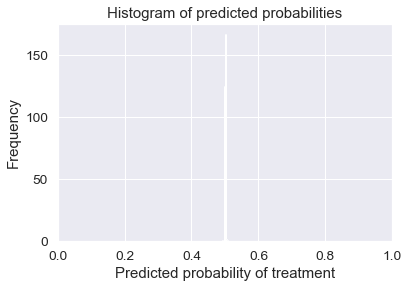

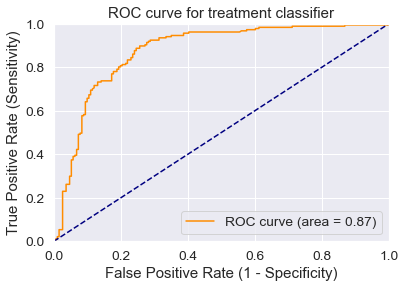

[[137  54]
 [ 15 172]]


In [381]:
boosting()

In [382]:
#Stacking
def stacking():
    # Building and fitting 
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    
    print('########### Stacking ###############')
    
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100

########### Stacking ###############
Accuracy: 0.8201058201058201
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0]


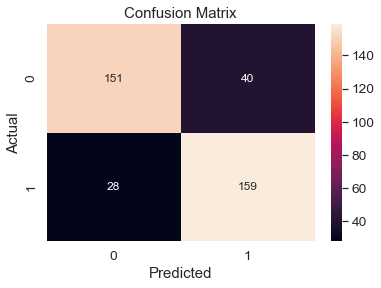

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.2094240837696335
Precision: 0.7989949748743719
AUC Score: 0.8204216479547554
Cross-validated AUC: 0.8431811731188892
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.01710346 0.98289654]
 [0.98675465 0.01324535]
 [0.98675465 0.01324535]
 [0.98675465 0.01324535]
 [0.98675465 0.01324535]
 [0.01710346 0.98289654]
 [0.98675465 0.01324535]
 [0.97307936 0.02692064]
 [0.03462234 0.96537766]
 [0.01710346 0.98289654]]
First 10 predicted probabilities:
 [[0.98289654]
 [0.01324535]
 [0.01324535]
 [0.01324535]
 [0.01324535]
 [0.98289654]
 [0.01324535]
 [0.02692064]
 [0.96537766]
 [0.98289654]]


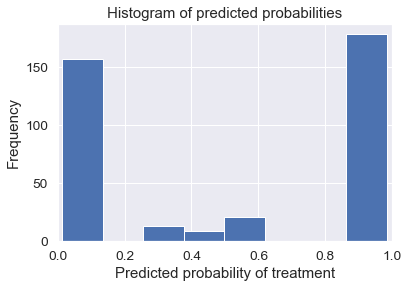

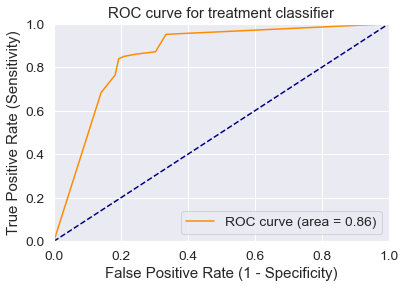

[[151  40]
 [ 28 159]]


In [383]:
stacking()

In [384]:
#11. Creating predictions on test set
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,0
376,1124,0


In [385]:
#Prepare Submission File
#We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for our data is the index). The prediction column will use the name of the target field.

In [386]:
# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv("results1.csv", index=False)

In [387]:
import pickle
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = model.predict(X_test)
# model=AdaBoostClassifier.SVC('linear')
# model.fit(X_train,Y_train)
file='mhc.sav'
pickle.dump(model,open(file,'wb'))

In [388]:
loaded_model=pickle.load(open('mhc.sav','rb'))

In [389]:
input_data=(0.431818,0,0,2,1,2,2,2)
idnp=np.asarray(input_data)
idreshaped=idnp.reshape(1,-1)
prediction=loaded_model.predict(idreshaped)
print(prediction)

[1]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [390]:
print(X.head(10))

        Age  Gender  family_history  benefits  care_options  anonymity  leave  \
0  0.431818       0               0         2             1          2      2   
1  0.590909       1               0         0             0          0      0   
2  0.318182       1               0         1             0          0      1   
3  0.295455       1               1         1             2          1      1   
4  0.295455       1               0         2             0          0      0   
5  0.340909       1               1         2             1          0      0   
6  0.386364       0               1         1             0          1      1   
7  0.477273       1               0         1             2          2      0   
8  0.545455       0               1         2             2          1      3   
9  0.113636       1               0         0             0          0      0   

   work_interfere  
0               2  
1               3  
2               3  
3               2  
4       

In [391]:
#print(X.index([494])

In [392]:
for column in X.columns:
    print(column)

Age
Gender
family_history
benefits
care_options
anonymity
leave
work_interfere


In [393]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1257 non-null   float64
 1   Gender          1257 non-null   int32  
 2   family_history  1257 non-null   int32  
 3   benefits        1257 non-null   int32  
 4   care_options    1257 non-null   int32  
 5   anonymity       1257 non-null   int32  
 6   leave           1257 non-null   int32  
 7   work_interfere  1257 non-null   int32  
dtypes: float64(1), int32(7)
memory usage: 86.3 KB
None


In [394]:
print(X.describe)

<bound method NDFrame.describe of            Age  Gender  family_history  benefits  care_options  anonymity  \
0     0.431818       0               0         2             1          2   
1     0.590909       1               0         0             0          0   
2     0.318182       1               0         1             0          0   
3     0.295455       1               1         1             2          1   
4     0.295455       1               0         2             0          0   
...        ...     ...             ...       ...           ...        ...   
1254  0.181818       1               0         1             0          0   
1255  0.318182       1               1         2             2          2   
1256  0.363636       1               1         2             2          0   
1257  0.636364       0               0         1             2          0   
1258  0.159091       1               1         2             2          2   

      leave  work_interfere  
0         2

In [395]:
print(train_df[['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']].head(10))

        Age  Gender  family_history  benefits  care_options  anonymity  leave  \
0  0.431818       0               0         2             1          2      2   
1  0.590909       1               0         0             0          0      0   
2  0.318182       1               0         1             0          0      1   
3  0.295455       1               1         1             2          1      1   
4  0.295455       1               0         2             0          0      0   
5  0.340909       1               1         2             1          0      0   
6  0.386364       0               1         1             0          1      1   
7  0.477273       1               0         1             2          2      0   
8  0.545455       0               1         2             2          1      3   
9  0.113636       1               0         0             0          0      0   

   work_interfere  
0               2  
1               3  
2               3  
3               2  
4       